Text(0, 0.5, 'qwerty dimension 2')

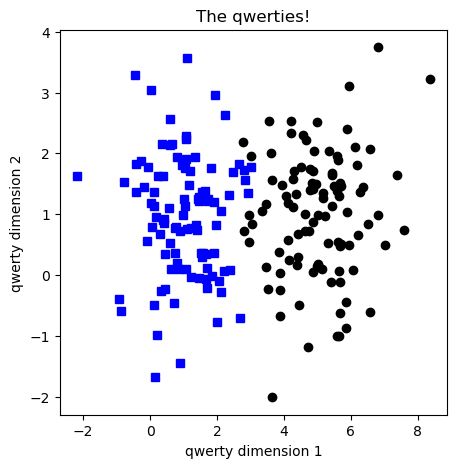

In [1]:
import torch
import torch.nn as nn
import numpy as np

import torch.nn.functional as F
import matplotlib.pyplot as plt

# create data
nPerClust = 100
blur = 1

A = [1,1]
B = [5,1]

# generate data
a = [ A[0] + np.random.randn(nPerClust)*blur, A[1] + np.random.randn(nPerClust)*blur]
b = [ B[0] + np.random.randn(nPerClust)*blur, B[1] + np.random.randn(nPerClust)*blur]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1))))

# concat into matrix
data_np = np.hstack((a,b)).T

# convert
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()


# show
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'bs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')

In [2]:
class theClass4NN(nn.Module):
    def __init__(self):
        super().__init__()

        ### Input layer
        self.input = nn.Linear(2,1)
        ### Output layer
        self.output= nn.Linear(1,1)
    
    def forward(self,x):
        x = self.input(x)
        x = F.relu(x)
        x = self.output(x)
        x = torch.sigmoid(x)
        return x


ANNClassify = theClass4NN()

In [3]:
learningRate = 0.01

# loss function
lossfun = nn.BCELoss() # Binary Cross Entropy

# optimizer
optimizer = torch.optim.SGD(ANNClassify.parameters(), lr=learningRate)

In [4]:
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):
    yHat = ANNClassify(data)
    # compute loss
    loss = lossfun(yHat, labels)
    losses[epochi] = loss

    # backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Text(0, 0.5, 'Loss')

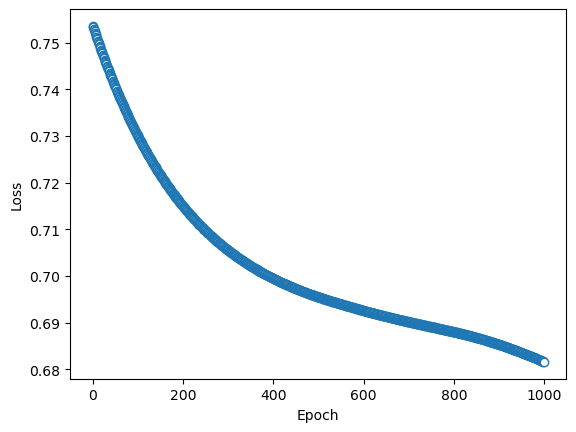

In [5]:
# show the losses
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [6]:
# predictions

predictions = ANNClassify(data)


predlabels = predictions > .5

# find errors
misclasified = np.where(predlabels != labels)[0]

# total accuracy
totalacc = 100 - 100*len(misclasified)/(2*nPerClust)

print('Final accuracy: %g%%' %totalacc)

Final accuracy: 63.5%


Text(0.5, 1.0, '63.5% correct')

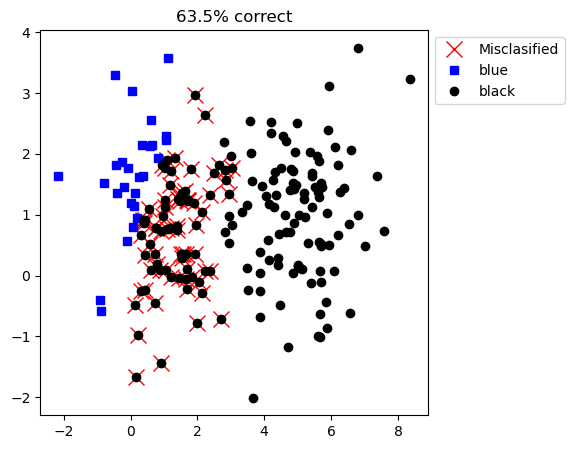

In [7]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclasified,0], data[misclasified,1], 'rx', markersize=12)
plt.plot(data[np.where(~predlabels)[0],0], data[np.where(~predlabels)[0],1], 'bs')
plt.plot(data[np.where(predlabels)[0],0], data[np.where(predlabels)[0],1], 'ko')

plt.legend(['Misclasified', 'blue', 'black'], bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')